#TASK: Leverage NLP for Tableau formulas identification

Leveraging Natural Language Processing (NLP) for Tableau formulas identification involves using language models to interpret and understand natural language descriptions of analytical tasks and then automatically generating corresponding Tableau formulas. While this is a challenging task, it's feasible with the help of advanced NLP models. Below are general steps to approach this task:

In [1]:
! pip install opencv-python
! pip install pandas
! pip install nltk
! pip install spacy
! pip install spacy-lookups-data
! python -m spacy download en_core_web_sm
#! python -m spacy link en_core_web_sm en


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Here's a basic example of using spaCy that should work without any issues related to lookup tables once spacy-lookups-data is installed:



In [2]:
import spacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")  # Make sure you've downloaded this model

# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Print the document text and perform operations as needed
print(doc.text)


Apple is looking at buying U.K. startup for $1 billion


In [3]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize,wordpunct_tokenize
from google.colab.patches import cv2_imshow
nltk.download('punkt')
import spacy
from spacy import displacy
from spacy.matcher import matcher
from spacy.tokens import span
from spacy.language import Language
from spacy.pipeline import EntityRuler
from spacy.util import minibatch


# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Identify data source in Tableau

In [4]:
from google.colab import files
file="formulas_test.xlsx"
if file not in os.listdir('/content/'):
      files.upload()

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#! cd /content/drive/My\ Drive/Colab_2024
#! cp /content/drive/My\ Drive/Colab_2024/*.png /content/
#! ls -all

# TASK: FORMULA CONVERSION

1. Define Use Cases:
Clearly define the use cases for which you want to leverage NLP for Tableau formulas identification. For example, you might want to interpret natural language descriptions and generate Tableau formulas for common tasks like aggregations, calculations, or filtering.

2. Data Collection:
Collect a dataset that includes examples of natural language descriptions paired with their corresponding Tableau formulas. The dataset should cover a variety of scenarios to train a model that can generalize well.

# Normalize Formulas Tableau

In [7]:
def normalize_formula(text):
    # Add space after function names if missing
    text = re.sub(r"(\w)\(", r"\1 (", text)
    # Ensure there's a space before and after parentheses
    text = re.sub(r"\s*\(\s*", " ( ", text)
    text = re.sub(r"\s*\)\s*", " ) ", text)
    # Ensure there's a space before and after square brackets
    text = re.sub(r"\s*\[\s*", " [ ", text)
    text = re.sub(r"\s*\]\s*", " ] ", text)
    # Ensure there's a space before and after curly brackets
    text = re.sub(r"\s*\{\s*", " { ", text)
    text = re.sub(r"\s*\}\s*", " } ", text)
    # Ensure there's a space before and after comparison symbols
    text = re.sub(r"\s*\==\s*", " == ", text)
    text = re.sub(r"(?<!\=)\s*\=\s*(?!=)", " = ", text)
    text = re.sub(r"\s*\>=\s*", " >= ", text)
    text = re.sub(r"\s*\<=\s*", " <= ", text)
    text = re.sub(r"\s*\>\s*", " > ", text)
    text = re.sub(r"\s*\<\s*", " < ", text)
    # Ensure there's a space before and after interrogative/exclamative symbols
    text = re.sub(r"\s*\?\s*", " ? ", text)
    text = re.sub(r"\s*\!\s*", " ! ", text)

    return text


In [8]:
df=pd.read_excel("formulas.xlsx")
print(df.head(5))

                                  Description        Formula (Tableau)
0                         Sum of Sepal Length        SUM(Sepal Length)
1      Average Sepal Width across all entries         AVG(Sepal Width)
2                Find the median Petal Length     MEDIAN(Petal Length)
3  Count the number of records in the dataset                 COUNT(*)
4       Count distinct species in the dataset  COUNT DISTINCT(Species)


In [9]:
df.columns

Index(['Description', 'Formula (Tableau)'], dtype='object')

In [10]:
df[df.columns[1]]=df[df.columns[1]].apply(lambda x:normalize_formula(x))

In [11]:
print(df.head(10))

                                         Description  \
0                                Sum of Sepal Length   
1             Average Sepal Width across all entries   
2                       Find the median Petal Length   
3         Count the number of records in the dataset   
4              Count distinct species in the dataset   
5                      Minimum value of Sepal Length   
6           Maximum Petal Width found in the dataset   
7                           Group records by Species   
8  Sort the entries by Sepal Length in ascending ...   
9                        List Species alphabetically   

                Formula (Tableau)  
0           SUM ( Sepal Length )   
1            AVG ( Sepal Width )   
2        MEDIAN ( Petal Length )   
3                    COUNT ( * )   
4     COUNT DISTINCT ( Species )   
5           MIN ( Sepal Length )   
6            MAX ( Petal Width )   
7           GROUP BY ( Species )   
8  ORDER BY ( Sepal Length ASC )   
9       ORDER BY ( Spec

# Formulas_test

In [12]:
dff=pd.read_excel("formulas_test.xlsx")
print(dff.head(10))

                                        Description  \
0                  Total Sepal Width in the dataset   
1           Average Petal Length across all flowers   
2                             Median of Sepal Width   
3                 Number of entries in the database   
4                     Unique count of Petal Lengths   
5                              Smallest Petal Width   
6                              Largest Sepal Length   
7                Categorize flowers by Petal Length   
8  Organize data by Petal Width in descending order   
9               Alphabetize entries by Species name   

              Formula (Tableau)  
0              SUM(Sepal Width)  
1             AVG(Petal Length)  
2           MEDIAN(Sepal Width)  
3                      COUNT(*)  
4  COUNT DISTINCT(Petal Length)  
5              MIN(Petal Width)  
6             MAX(Sepal Length)  
7        GROUP BY(Petal Length)  
8    ORDER BY(Petal Width DESC)  
9         ORDER BY(Species ASC)  


In [13]:
dff.shape

(54, 2)

In [14]:
dff[dff.columns[1]]=dff[dff.columns[1]].apply(lambda x:normalize_formula(x))

In [15]:
print(dff.head(10))

                                        Description  \
0                  Total Sepal Width in the dataset   
1           Average Petal Length across all flowers   
2                             Median of Sepal Width   
3                 Number of entries in the database   
4                     Unique count of Petal Lengths   
5                              Smallest Petal Width   
6                              Largest Sepal Length   
7                Categorize flowers by Petal Length   
8  Organize data by Petal Width in descending order   
9               Alphabetize entries by Species name   

                  Formula (Tableau)  
0              SUM ( Sepal Width )   
1             AVG ( Petal Length )   
2           MEDIAN ( Sepal Width )   
3                      COUNT ( * )   
4  COUNT DISTINCT ( Petal Length )   
5              MIN ( Petal Width )   
6             MAX ( Sepal Length )   
7        GROUP BY ( Petal Length )   
8    ORDER BY ( Petal Width DESC )   
9         ORDE

3. Preprocess the Data:
Clean and preprocess the collected dataset. Tokenize the natural language descriptions and normalize the Tableau formulas to create input-output pairs for training the NLP model.

# Tokenization of the formulas.xlsx dataset

In [16]:
dg_tok=df.apply(lambda x:[wordpunct_tokenize(y) for y in x])

In [17]:
dg_tok=dg_tok.rename(columns=lambda x:"Tokenized " + x)
dg_tok=dg_tok.loc[:,dg_tok.columns[[0,1]]]
dg_tok.rename(columns=lambda x:x.strip(), inplace=True)
print(dg_tok.head(5))


                               Tokenized Description  \
0                           [Sum, of, Sepal, Length]   
1      [Average, Sepal, Width, across, all, entries]   
2                 [Find, the, median, Petal, Length]   
3  [Count, the, number, of, records, in, the, dat...   
4       [Count, distinct, species, in, the, dataset]   

        Tokenized Formula (Tableau)  
0        [SUM, (, Sepal, Length, )]  
1         [AVG, (, Sepal, Width, )]  
2     [MEDIAN, (, Petal, Length, )]  
3                  [COUNT, (, *, )]  
4  [COUNT, DISTINCT, (, Species, )]  


#description={} with keys=['text','label','vocab','stopwords']

In [18]:
description={}
description['stopwords']=['\\','Iri','Se','C','Sepal','ica','Length',"'s",'.',"'", 's', 'a','(',')','Petal','Distinct',"Width",',',"'","[","]"]
description['text']=[sentence for sentence in df[df.columns[0]]]
description['vocab']=list(set([word  for ii in range(len(dg_tok[dg_tok.columns[0]])) for word  in dg_tok[dg_tok.columns[0]][ii] if word not in description['stopwords']]))
len_desc_vocab=len(description['vocab'])

In [19]:
print(len_desc_vocab,description['vocab'])

129 ['sorted', 'Average', 'with', '5', 'Entries', 'low', 'median', 'each', 'starting', 'Top', 'exactly', 'highest', 'Total', 'Maximum', 'observation', 'entries', 'start', 'only', 'ascending', 'order', 'occurrences', 'in', 'Lowest', 'virginica', 'year', 'Widths', '3', 'from', 'setosa', '0', 'where', 'types', 'Aggregate', 'smallest', 'over', '%', 'Species', 'greater', 'Filter', 'there', 'List', '?', 'many', 'bottom', 'unique', 'than', '2', 'the', 'top', 'or', 'assuming', 'Count', 'total', 'grouped', 'is', '1', 'Find', 'Iris', 'show', 'Setosa', 'Median', 'alphabetically', 'starts', '4', 'Date', 'both', 'flowers', 'dataset', 'are', 'points', 'by', 'contains', 'Number', 'Sort', 'within', 'ends', 'less', 'not', 'for', 'Select', 'Group', 'above', 'name', 'January', 'versicolor', 'What', 'last', 'Show', 'this', 'all', 'least', 'records', 'between', 'across', '10th', 'average', 'Sum', 'percentile', 'of', 'descending', 'Determine', 'recorded', 'found', 'Calculate', 'Organize', 'field', 'Highest'

#formulas={} with keys=['text','label','vocab','stopwords']

In [20]:
formulas={}
formulas['stopwords']=['\\','Iri','Se','C','Sepal','ica','Length',"'s",'.',"'", 's', 'a','(',')','Petal','Distinct','distinct',"Width",',','BY','by','from',"[","]"]
formulas['text']=[sentence for sentence in df[df.columns[1]]]
formulas['vocab']=list(set([word  for ii in range(len(dg_tok[dg_tok.columns[1]])) for word  in dg_tok[dg_tok.columns[1]][ii] if word not in formulas['stopwords']]))
len_formulas_vocab=len(formulas['vocab'])

In [21]:
print(len_formulas_vocab,formulas['vocab'])

70 ['4', 'AND', 'DESC', '5', '=', 'Date', '0', 'setosa', 'DISTINCT', ':', 'STARTSWITH', 'LISTED', '>', 'RANK', 'SORT', '{', 'FROM', 'FIXED', 'Species', '<', 'ORDER', 'END', '}', 'IF', 'THEN', 'MAX', 'ENDSWITH', 'highest', '"', 'NULL', 'ELSE', '*', '2', 'WITH', 'LEFT', 'MIN', 'to', 'BETWEEN', 'INDEX', '-', 'ASC', 'AVG', 'SORTED', 'COUNT', 'color', 'versicolor', 'SUM', 'lowest', 'CONTAINS', '”', '1', '“', 'DATETRUNC', 'month', 'virginica', 'TOP', '!', 'TODAY', '9', 'Setosa', 'YEAR', 'COUNTD', 'year', 'RANK_PERCENTILE', 'alphabetically', '3', 'GROUP', 'STARTS', "',", 'MEDIAN']


# Recognition of entities

In [22]:
def get_pos_(data,col_name):
  dd=[]
  gg=[]
  for tok in data[col_name]:

          for ent in nlp(str(list(str(tok).split()))):
              # checking text between punct
              dd.append({ent.text:ent.pos_})
              gg.append({ent.pos_:ent.text})
  return dd,gg


def get_entity(data,col_name):
     #from spacy.tokens import DocBin
     dd=[]
     dt=[]
     for text in data[col_name]:
          doc=nlp(text)
          dp=[text]
          dt_e={}
          dt_e["entities"]=[]
          for ent in doc.ents:
                    dp.append([ent.text,ent.label_])
                    dt_e["entities"].append((ent.start_char,ent.end_char,ent.label_))
          dt.append((text,dt_e))
          dd.append(dp)
     return dd,dt

In [23]:
def get_patterns(data,col_name):
     dt,dp=get_pos_(data,col_name)

     pos_=[list(item.keys())[0] for item in dp]
     pos_=list(set(pos_))
     print(dt)
     print(col_name,":",pos_)
     patterns={}
     patterns_head=[]
     for key in pos_:
         patterns.update({key:list(set([d[key] for d in dp if  key==list(d.keys())[0] and d[key] not in data["stopwords"]]))})
     return patterns

#Pipe entities to description

In [24]:
dg_ent={}

In [25]:
p_d=dg_ent['Patterns_Description']=get_patterns(description,"vocab")

[{'[': 'X'}, {"'": 'PUNCT'}, {'sorted': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Average': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'with': 'ADP'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'NUM'}, {'5': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'Entries': 'NOUN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'low': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'median': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'each': 'PRON'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'starting': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Top': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'exactly': 'ADV'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'highest': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PROPN'}, {'Total': 'ADJ'}, {"'": 'PUNCT'}, {']

In [26]:
#nlp = spacy.load('en_core_web_sm')

# Function to create and return an EntityRuler with specified patterns
def create_ruler(patterns, label):
    ruler = EntityRuler(nlp, overwrite_ents=True)
    formatted_patterns = [{"label": label, "pattern": pattern} for pattern in patterns]
    ruler.add_patterns(formatted_patterns)
    return ruler

desc_conj=p_d['CCONJ']+ p_d['SCONJ']
desc_intj=p_d['INTJ']
desc_verb=p_d['VERB'] + p_d['AUX']
desc_num=p_d['NUM']
desc_adv=p_d['ADV']
desc_pron=p_d['PRON'] + p_d['DET']
desc_adp=p_d['ADP']
desc_noun=[x for x in p_d['X'] if x != p_d['X'][1]]+p_d['NOUN'] +['dataset']
desc_adj=[p_d['X'][1]]+[x for x in p_d['ADJ'] if x !='dataset' ]
desc_propn=['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width']+p_d['PROPN']

# Create rulers
ruler_conj = create_ruler(desc_conj,'CONJ')
ruler_intj = create_ruler(desc_intj,'INTJ')
ruler_verb = create_ruler(desc_verb,'VERB')
ruler_num  = create_ruler(desc_num,'NUM')
ruler_adv  = create_ruler(desc_adv,'ADV')
ruler_pron = create_ruler(desc_pron,'PRON')
ruler_adp  = create_ruler(desc_adp,'ADP')
ruler_noun = create_ruler(desc_noun, "NOUN")
ruler_adj = create_ruler(desc_adj, "ADJ")
ruler_propn = create_ruler(desc_propn,"PROPN")

# Create component factories
@Language.component("ruler_conj")
def ruler_conj_component(doc):
    return ruler_conj(doc)

@Language.component("ruler_intj")
def ruler_intj_component(doc):
    return ruler_intj(doc)

@Language.component("ruler_verb")
def ruler_verb_component(doc):
    return ruler_verb(doc)

@Language.component("ruler_num")
def ruler_num_component(doc):
    return ruler_num(doc)

@Language.component("ruler_adv")
def ruler_adv_component(doc):
    return ruler_adv(doc)

@Language.component("ruler_pron")
def ruler_pron_component(doc):
    return ruler_pron(doc)

@Language.component("ruler_adp")
def ruler_adp_component(doc):
    return ruler_adp(doc)

@Language.component("ruler_noun")
def ruler_noun_component(doc):
    return ruler_noun(doc)

@Language.component("ruler_adj")
def ruler_adj_component(doc):
    return ruler_adj(doc)

@Language.component('ruler_propn')
def ruler_propn_component(doc):
     return ruler_propn(doc)

# Add the components to the pipeline
nlp.add_pipe("ruler_intj", before="ner")
nlp.add_pipe("ruler_verb",before="ner")
nlp.add_pipe("ruler_num", before="ner")
nlp.add_pipe("ruler_adv", before="ner")
nlp.add_pipe("ruler_pron", before="ner")
nlp.add_pipe("ruler_adp", before="ner")
nlp.add_pipe("ruler_noun", before="ner")
nlp.add_pipe("ruler_adj", before="ner")
nlp.add_pipe("ruler_propn", before = "ner")
nlp.to_disk('/content/ner_desc')
# Test
#doc=nlp("Sum of Sepal Length. Average Sepal Width across all entries . Count the number of records in the dataset")
#for ent in doc.ents:
#    print(ent.text, ent.label_)
ent_desc,Train_desc_data=get_entity(df,df.columns[0])

In [27]:
# Test
doc=nlp("Sum of Sepal Length. Average Sepal Width across all entries . Count the number of records in the dataset")
for ent in doc.ents:
    print(ent.text, ent.label_)

Sum NOUN
of ADP
Sepal Length PROPN
Average ADJ
Sepal Width PROPN
across ADP
all PRON
entries NOUN
Count PROPN
the PRON
number NOUN
of ADP
records NOUN
in ADP
the PRON
dataset NOUN


In [28]:
for pat in p_d:
   print({pat:p_d[pat]})

{'NOUN': ['Sum', 'Entries', 'flowers', 'types', 'points', 'Determine', 'Species', 'field', 'Number', 'List', 'data', 'Lengths', 'species', 'value', 'number', 'observation', 'entries', 'name', 'color', 'flower', 'versicolor', 'order', 'occurrences', 'month', 'year', 'records', 'Widths']}
{'X': ['median', 'setosa', '10th', 'virginica']}
{'NUM': ['4', '5', '1', '10', '0', '3', '2']}
{'PRON': ['both', 'this', 'there', 'all', 'each', 'What']}
{'DET': ['the']}
{'AUX': ['is', 'are']}
{'ADP': ['across', 'with', 'for', 'in', 'above', 'of', 'at', 'over', 'within', 'between', 'than', 'from', 'by']}
{'VERB': ['sorted', 'Aggregate', 'descending', 'recorded', 'contains', 'Organize', 'found', 'starting', 'ends', 'assuming', 'grouped', 'start', 'ascending', 'Find', 'Show', 'show', 'count', 'starts', 'Display']}
{'ADV': ['alphabetically', 'Sort', 'exactly', 'only']}
{'SCONJ': ['where', 'How', 'how']}
{'INTJ': ['%']}
{'PROPN': ['Date', 'Iris', 'Maximum', 'Rank', 'Filter', 'Count', 'Group', 'Setosa', 'Me

In [29]:
print(ent_desc)

[['Sum of Sepal Length', ['Sum', 'NOUN'], ['of', 'ADP'], ['Sepal Length', 'PROPN']], ['Average Sepal Width across all entries', ['Average', 'ADJ'], ['Sepal Width', 'PROPN'], ['across', 'ADP'], ['all', 'PRON'], ['entries', 'NOUN']], ['Find the median Petal Length', ['Find', 'VERB'], ['the', 'PRON'], ['median', 'NOUN'], ['Petal Length', 'PROPN']], ['Count the number of records in the dataset', ['Count', 'PROPN'], ['the', 'PRON'], ['number', 'NOUN'], ['of', 'ADP'], ['records', 'NOUN'], ['in', 'ADP'], ['the', 'PRON'], ['dataset', 'NOUN']], ['Count distinct species in the dataset', ['Count', 'PROPN'], ['distinct', 'ADJ'], ['species', 'NOUN'], ['in', 'ADP'], ['the', 'PRON'], ['dataset', 'NOUN']], ['Minimum value of Sepal Length', ['Minimum', 'PROPN'], ['value', 'NOUN'], ['of', 'ADP'], ['Sepal Length', 'PROPN']], ['Maximum Petal Width found in the dataset', ['Maximum', 'PROPN'], ['Petal Width', 'PROPN'], ['found', 'VERB'], ['in', 'ADP'], ['the', 'PRON'], ['dataset', 'NOUN']], ['Group records 

#Train Description Data

In [30]:
for item in Train_desc_data:
    print(item)

('Sum of Sepal Length', {'entities': [(0, 3, 'NOUN'), (4, 6, 'ADP'), (7, 19, 'PROPN')]})
('Average Sepal Width across all entries', {'entities': [(0, 7, 'ADJ'), (8, 19, 'PROPN'), (20, 26, 'ADP'), (27, 30, 'PRON'), (31, 38, 'NOUN')]})
('Find the median Petal Length', {'entities': [(0, 4, 'VERB'), (5, 8, 'PRON'), (9, 15, 'NOUN'), (16, 28, 'PROPN')]})
('Count the number of records in the dataset', {'entities': [(0, 5, 'PROPN'), (6, 9, 'PRON'), (10, 16, 'NOUN'), (17, 19, 'ADP'), (20, 27, 'NOUN'), (28, 30, 'ADP'), (31, 34, 'PRON'), (35, 42, 'NOUN')]})
('Count distinct species in the dataset', {'entities': [(0, 5, 'PROPN'), (6, 14, 'ADJ'), (15, 22, 'NOUN'), (23, 25, 'ADP'), (26, 29, 'PRON'), (30, 37, 'NOUN')]})
('Minimum value of Sepal Length', {'entities': [(0, 7, 'PROPN'), (8, 13, 'NOUN'), (14, 16, 'ADP'), (17, 29, 'PROPN')]})
('Maximum Petal Width found in the dataset', {'entities': [(0, 7, 'PROPN'), (8, 19, 'PROPN'), (20, 25, 'VERB'), (26, 28, 'ADP'), (29, 32, 'PRON'), (33, 40, 'NOUN')]}

#Pipeline Formulas (Tableau) entities

In [31]:
p_t=dg_ent['Patterns_Formula(Tableau)']=get_patterns(formulas,'vocab')

[{'[': 'X'}, {"'": 'NUM'}, {'4': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'AND': 'CCONJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'DESC': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'NUM'}, {'5': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PROPN'}, {'=': 'X'}, {"'": 'X'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Date': 'PROPN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'NUM'}, {'0': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'setosa': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'DISTINCT': 'NOUN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {':': 'PUNCT'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'STARTSWITH': 'X'}, {"'": 'NOUN'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'LISTED': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'>': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"

In [32]:
for pat in p_t:
   print({pat:p_t[pat]})

{'NOUN': ['ORDER', 'month', 'DISTINCT', 'INDEX', 'TODAY', 'YEAR', 'year', 'color', 'ENDSWITH', 'versicolor', 'FIXED', 'Species']}
{'X': ['setosa', '=', 'virginica', 'STARTSWITH', '>', 'CONTAINS', '*', '<']}
{'NUM': ['4', '5', '1', '0', 'TOP', '9', '3', '2']}
{'PRON': ['}']}
{'AUX': ['RANK_PERCENTILE']}
{'ADP': ['BETWEEN', 'WITH', 'FROM']}
{'VERB': ['-', 'DESC', 'RANK', 'LISTED']}
{'ADV': ['alphabetically', 'ELSE', 'SORT', 'THEN']}
{'SCONJ': ['IF']}
{'INTJ': []}
{'PROPN': ['Date', 'MIN', 'DATETRUNC', 'END', 'MEDIAN', 'ASC', 'AVG', 'MAX', 'Setosa', 'COUNTD', 'COUNT', 'GROUP', 'NULL', 'STARTS', 'SUM', 'LEFT']}
{'CCONJ': ['AND']}
{'PART': ['to']}
{'ADJ': ['lowest', 'SORTED', 'highest']}
{'PUNCT': ['”', '“', ':', '!', '{', '"']}


In [33]:
p_t['ARG']=['[Sepal Length]','[Sepal Width]','[Petal Length]','[Petal Width]', '[Species]']
p_t['ARGN']=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']
p_t['NOUN'] =['month', 'TODAY', 'color','YEAR','versicolor','setosa','year','virginica']
p_t['STOPWORDS']=['[Sepal','Sepal','[Petal','Width]','Width','Petal','Length]',"'Se'",':','"virginica",'"setosa",'','{',')','*',"'Setosa'","'month', ",'4.0 AND','"setosa" AND','ica',"Iri",'!= 3.0','"versicolor" AND',"Species STARTS WITH 'Se'","Length",'"Iri"' ]
p_t['NUM']=[ff  for ff in p_t['NUM'] if ff !='TOP']+['1.5','2.5','4.5','3.0','3','2.0','5.0']
p_t['ADP']+=['to','AND','>=','<','!=','<=','=','>']
p_t['ADV']+=['highest to lowest','ASC','DESC','NULL','LEFT']
p_t['ADJ']=[ff for ff in p_t['ADJ'] if  ff!='SORTED']
ptt=p_t['ARG']+p_t['NOUN']+p_t['NUM'] + p_t['STOPWORDS'] + p_t['ARGN'] + p_t['ADV'] + p_t['ADP']+p_t['ADJ']
p_t['OPER']=['STARTS WITH']

In [34]:
print(p_t['OPER'])

['STARTS WITH']


In [35]:
import re
p_t['OPER']=[]
p_t['COPER']=[]
patterns='\(| = | >= | > | \[ | \) | \{ | \]'
tr_0=[]
for tr in df[df.columns[1]]:
    try:
      it0,it1=re.split(patterns,tr)[0:2]
    except:
         it0=re.split(patterns,tr)[0:2][0]

    it01=it0.split()

    if len(it01)==1:
           iten=it01[0]
    elif len(it01)==2:
            iten=it01[0] +' '+ it01[1]
    else:
          iten=''
          for item in it01:
            if item not in tr_0 and item not in ptt:
               iten+=item +' '
          iten=iten.rstrip()
          #print(it01,'-->',iten)

    if iten not in tr_0 and iten not in ptt:
              #print(it01)
              tr_0.append(iten)


print(tr_0)

['SUM', 'AVG', 'MEDIAN', 'COUNT', 'COUNT DISTINCT', 'MIN', 'MAX', 'GROUP BY', 'ORDER BY', 'TOP BY', 'STARTS', 'COUNTD', 'ENDSWITH', 'INDEX', 'IF', 'DATETRUNC', 'RANK_PERCENTILE', 'SORTED BY', 'RANK', 'LISTED', 'STARTSWITH']


In [36]:
p_t['OPER']+=tr_0
p_t['OPER'][p_t['OPER'].index('LISTED')]='LISTED FROM'
p_t['OPER'][p_t['OPER'].index('TOP BY')]='TOP'
p_t['OPER']+=['IF CONTAINS','BY']
p_t['NOUN']=[ff for ff in p_t['NOUN'] if ff not in p_t['OPER']]
#p_t['PROPN']=[ff for ff in p_t['PROPN'] if ff not in p_t['OPER']+p_t['NOUN']]


# Pipe entities to Formulas Tableau

In [37]:

#nlp = spacy.load('en_core_web_sm')

# Function to create and return an EntityRuler with specified patterns

oper_arg=p_t['ARG']
oper_argn=p_t['ARGN']
oper_numm=p_t['NUM']
oper_advv=p_t['ADV']
oper_oper=p_t['OPER']
oper_adpp=p_t['ADP']
oper_nounn=p_t['NOUN']
oper_adjj=p_t['ADJ']

# Create rulers
ruler_arg = create_ruler(oper_arg,'ARG')
#ruler_intj = create_ruler(oper_intj,'INTJ')
ruler_argn = create_ruler(oper_argn,'ARGN')
ruler_numm  = create_ruler(oper_numm,'NUM')
ruler_advv  = create_ruler(oper_advv,'ADV')
#ruler_pron = create_ruler(oper_pron,'PRON')
ruler_adpp  = create_ruler(oper_adpp,'ADP')
ruler_nounn = create_ruler(oper_nounn, "NOUN")
ruler_adjj = create_ruler(oper_adjj, "ADJ")
ruler_oper = create_ruler(oper_oper,"OPER")

# Create component factories
@Language.component("ruler_arg")
def ruler_arg_component(doc):
    return ruler_arg(doc)

#@Language.component("ruler_intj")
#def ruler_intj_component(doc):
#    return ruler_intj(doc)

@Language.component("ruler_argn")
def ruler_argn_component(doc):
    return ruler_argn(doc)

@Language.component("ruler_numm")
def ruler_numm_component(doc):
    return ruler_numm(doc)

@Language.component("ruler_advv")
def ruler_advv_component(doc):
    return ruler_advv(doc)

@Language.component("ruler_oper")
def ruler_oper_component(doc):
    return ruler_oper(doc)

@Language.component("ruler_adpp")
def ruler_adpp_component(doc):
    return ruler_adpp(doc)

@Language.component("ruler_nounn")
def ruler_nounn_component(doc):
    return ruler_nounn(doc)

@Language.component("ruler_adjj")
def ruler_adjj_component(doc):
    return ruler_adjj(doc)

#@Language.component('ruler_propn')
#def ruler_propn_component(doc):
#     return ruler_propn(doc)

# Add the components to the pipeline
nlp.add_pipe("ruler_arg", before="ner")
nlp.add_pipe("ruler_argn",before="ner")
nlp.add_pipe("ruler_numm", before="ner")
nlp.add_pipe("ruler_advv", before="ner")
nlp.add_pipe("ruler_oper", before="ner")
nlp.add_pipe("ruler_adpp", before="ner")
nlp.add_pipe("ruler_nounn", before="ner")
nlp.add_pipe("ruler_adjj", before="ner")

nlp.to_disk('/content/ner_formulas')
#nlp.add_pipe("ruler_propn", before = "ner")
ent_formulas,Train_formulas_data=get_entity(df,df.columns[1])

In [38]:
# Test
doc=nlp("SUM (Sepal Length ) AVG ( Sepal Length )")
for ent in doc.ents:
    print(ent.text, ent.label_)
#print(get_entity(df,df.columns[1]))

SUM OPER
Sepal Length ARGN
AVG OPER
Sepal Length ARGN


In [39]:
#Test
print(ent_formulas)

[['SUM ( Sepal Length ) ', ['SUM', 'OPER'], ['Sepal Length', 'ARGN']], ['AVG ( Sepal Width ) ', ['AVG', 'OPER'], ['Sepal Width', 'ARGN']], ['MEDIAN ( Petal Length ) ', ['MEDIAN', 'OPER'], ['Petal Length', 'ARGN']], ['COUNT ( * ) ', ['COUNT', 'OPER']], ['COUNT DISTINCT ( Species ) ', ['COUNT DISTINCT', 'OPER'], ['Species', 'ARGN']], ['MIN ( Sepal Length ) ', ['MIN', 'OPER'], ['Sepal Length', 'ARGN']], ['MAX ( Petal Width ) ', ['MAX', 'OPER'], ['Petal Width', 'ARGN']], ['GROUP BY ( Species ) ', ['GROUP BY', 'OPER'], ['Species', 'ARGN']], ['ORDER BY ( Sepal Length ASC ) ', ['ORDER BY', 'OPER'], ['Sepal Length', 'ARGN'], ['ASC', 'ADV']], ['ORDER BY ( Species ASC ) ', ['ORDER BY', 'OPER'], ['Species', 'ARGN'], ['ASC', 'ADV']], ['Sepal Length > = 5.0', ['Sepal Length', 'ARGN'], ['> =', 'ADP'], ['5.0', 'NUM']], ['Petal Length BETWEEN 1.5 AND 2.5', ['Petal Length', 'ARGN'], ['BETWEEN', 'ADP'], ['1.5', 'NUM'], ['AND', 'ADP'], ['2.5', 'NUM']], ['TOP 3 BY ( Sepal Width DESC ) ', ['TOP', 'OPER'], 

#Train Formula (Tableau) data

In [40]:
for item in Train_formulas_data:
    print(item)

('SUM ( Sepal Length ) ', {'entities': [(0, 3, 'OPER'), (6, 18, 'ARGN')]})
('AVG ( Sepal Width ) ', {'entities': [(0, 3, 'OPER'), (6, 17, 'ARGN')]})
('MEDIAN ( Petal Length ) ', {'entities': [(0, 6, 'OPER'), (9, 21, 'ARGN')]})
('COUNT ( * ) ', {'entities': [(0, 5, 'OPER')]})
('COUNT DISTINCT ( Species ) ', {'entities': [(0, 14, 'OPER'), (17, 24, 'ARGN')]})
('MIN ( Sepal Length ) ', {'entities': [(0, 3, 'OPER'), (6, 18, 'ARGN')]})
('MAX ( Petal Width ) ', {'entities': [(0, 3, 'OPER'), (6, 17, 'ARGN')]})
('GROUP BY ( Species ) ', {'entities': [(0, 8, 'OPER'), (11, 18, 'ARGN')]})
('ORDER BY ( Sepal Length ASC ) ', {'entities': [(0, 8, 'OPER'), (11, 23, 'ARGN'), (24, 27, 'ADV')]})
('ORDER BY ( Species ASC ) ', {'entities': [(0, 8, 'OPER'), (11, 18, 'ARGN'), (19, 22, 'ADV')]})
('Sepal Length > = 5.0', {'entities': [(0, 12, 'ARGN'), (13, 16, 'ADP'), (17, 20, 'NUM')]})
('Petal Length BETWEEN 1.5 AND 2.5', {'entities': [(0, 12, 'ARGN'), (13, 20, 'ADP'), (21, 24, 'NUM'), (25, 28, 'ADP'), (29, 3

#TRAINING DATA: DESCRIPTION/FORMULAS TABLEAU

In [41]:
def training_data(TRAIN_DATA,MODEL, NITER, DROP, BATCHSIZE):
    import spacy
    import random
    from spacy.util import minibatch, compounding
    from spacy.training import Example
    import pandas as pd

    # Step 1: Load Your Customized Model
    path ='/content/'
    nlp = spacy.load(path+MODEL)  # Load your custom model

    # Assume 'ner' is in your custom model pipeline
    ner = nlp.get_pipe('ner')

    # Add new entity labels to the NER
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # Prepare the examples
    examples = [Example.from_dict(nlp.make_doc(text), annotations) for text, annotations in TRAIN_DATA]

    # Optionally disable other pipeline components during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

    history = pd.DataFrame(columns=['niter', 'losses'])

    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.resume_training()
        for i in range(NITER):
            losses = {}
            random.shuffle(examples)
            batches = minibatch(examples, size=BATCHSIZE)
            for batch in batches:

                nlp.update(
                    batch,
                    drop=DROP,
                    losses=losses,
                    sgd=optimizer
                )
            print("Losses", losses)
            history.loc[i] = [i, losses['ner']]

    return history


#SAVE THE TRAINED MODEL

In [42]:
def save_model(model_name,location):
   import os
   from pathlib import Path
   if location=='drive':
      from google.colab import drive
      drive.mount('/content/drive')
      # Define the base path for the folder where you want to save your model
      folder_path = '/content/drive/My Drive/MyModels'
   else:
      # Define the base path for the folder where you want to save your model
      folder_path = '/content/'

   # Create the folder if it doesn't exist
   os.makedirs(folder_path, exist_ok=True)
   model_path = os.path.join(folder_path, model_name)
   # Save the model to the specified directory in Google Drive
   nlp.to_disk(model_path)
   print(f'Model saved to: {model_path}')
   # Load the model to ensure it's been saved correctly
   nlp2 = spacy.load(model_path)



#EVALUATE THE MODEL

#Evaluate the Model on the Test Dataset

In [43]:
def evaluate_the_model(model_path, TEST_DATA):
    import spacy
    from spacy.training import Example

    nlp = spacy.load(model_path)

    # Convert test data to Example objects
    examples = []
    for text, annotations in TEST_DATA:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        examples.append(example)

    # Evaluate the model
    scores = nlp.evaluate(examples)
    return scores

# This separate function is not needed because evaluation can be directly done with nlp.evaluate()
# def evaluate(ner_model, examples):
#     pass


In [44]:
def make_predictions(model_path,texts,option=1):
    import spacy
    from spacy import displacy
    """
    options:
    1-print
    else-displacy ents
    """
    # Replace 'your_model_directory' with the path to your trained model
    nlp = spacy.load(model_path)
    print(nlp.pipe_names)
    if isinstance(texts,type)=='list' and option==1:
         for doc in nlp.pipe(texts):
              print([(ent.text, ent.label_) for ent in doc.ents])
    elif isinstance(texts,type)=='list' and option!=1:
         for doc in nlp.pipe(texts):
              displacy.render(doc, style="ent")
    elif isinstance(texts,type)!='list' and option==1:
          print(texts)
          # Process the text
          doc = nlp(texts)

          # Display the entities in the text
          for ent in doc.ents:
                 print(ent.text, ent.label_)
    else:
          print(texts)
          # Process the text
          doc = nlp(texts)
          displacy.render(doc, style="ent")


 # Training,saving and evaluation the Description Tableau data model

In [45]:
history_desc=training_data(Train_desc_data,'ner_desc',200,0.5,8)

Losses {'ner': 590.8340991298567}
Losses {'ner': 517.2801935132775}
Losses {'ner': 430.1417343597859}
Losses {'ner': 376.7305717971176}
Losses {'ner': 361.4539678543806}
Losses {'ner': 349.1828004717827}
Losses {'ner': 346.4026643037796}
Losses {'ner': 343.5300513282418}
Losses {'ner': 345.26780900359154}
Losses {'ner': 332.6000503003597}
Losses {'ner': 315.50352750718594}
Losses {'ner': 277.9440586864945}
Losses {'ner': 268.24818827211857}
Losses {'ner': 239.09859885275364}
Losses {'ner': 226.56408859914518}
Losses {'ner': 205.16302728001028}
Losses {'ner': 195.1578254494816}
Losses {'ner': 163.81318642105907}
Losses {'ner': 154.4138598954305}
Losses {'ner': 148.8097416519886}
Losses {'ner': 151.2068271164353}
Losses {'ner': 125.66647583089173}
Losses {'ner': 114.80988088710001}
Losses {'ner': 115.57249549360131}
Losses {'ner': 117.14171302350223}
Losses {'ner': 103.44818632985698}
Losses {'ner': 85.17041502195207}
Losses {'ner': 89.10089337256545}
Losses {'ner': 73.63459363988238}
Lo

Text(0.5, 1.0, 'Description Tableau data')

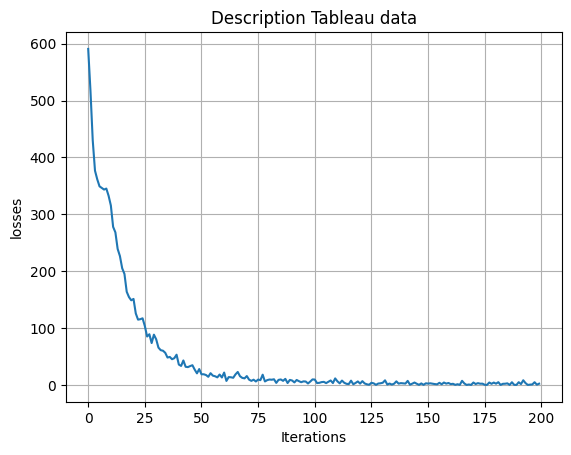

In [46]:
plt.plot(history_desc['niter'],history_desc['losses'])
plt.xlabel('Iterations')
plt.ylabel('losses')
plt.grid()
plt.title("Description Tableau data")

In [47]:
save_model('Description_Tableau_data',' ')





Model saved to: /content/Description_Tableau_data


In [48]:
# check if the model is working
# Assuming 'nlp' is your loaded model
path='/content/Description_Tableau_data'
nlp= spacy.load(path)
ner = nlp.get_pipe("ner")

# List all labels the NER has been trained on
labels = ner.labels
print(labels)


('ADJ', 'ADP', 'ADV', 'ARGN', 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'INTJ', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'NOUN', 'NUM', 'OPER', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'PRON', 'PROPN', 'QUANTITY', 'TIME', 'VERB', 'WORK_OF_ART')


In [49]:
path='/content/Description_Tableau_data'
Test_ent_desc,Test_desc_data=get_entity(dff,dff.columns[0])
scores=evaluate_the_model(path,Test_desc_data)


In [50]:
print(scores)

{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'tag_acc': None, 'sents_p': None, 'sents_r': None, 'sents_f': None, 'dep_uas': None, 'dep_las': None, 'dep_las_per_type': None, 'pos_acc': None, 'morph_acc': None, 'morph_micro_p': None, 'morph_micro_r': None, 'morph_micro_f': None, 'morph_per_feat': None, 'lemma_acc': None, 'ents_p': 1.0, 'ents_r': 1.0, 'ents_f': 1.0, 'ents_per_type': {'ADJ': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ARGN': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ADP': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'PRON': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'NOUN': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'PROPN': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'VERB': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'NUM': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'CARDINAL': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ADV': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'INTJ': {'p': 1.0, 'r': 1.0, 'f': 1.0}}, 'speed': 3271.0665068263006}


#Make predictions on Description Tableau Data

In [51]:
# text
make_predictions(path,dff[dff.columns[0]][3])

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ruler_intj', 'ruler_verb', 'ruler_num', 'ruler_adv', 'ruler_pron', 'ruler_adp', 'ruler_noun', 'ruler_adj', 'ruler_propn', 'ruler_arg', 'ruler_argn', 'ruler_numm', 'ruler_advv', 'ruler_oper', 'ruler_adpp', 'ruler_nounn', 'ruler_adjj', 'ner']
Number of entries in the database
Number NOUN
of ADP
entries NOUN
in ADP
the PRON


In [52]:
make_predictions(path,dff[dff.columns[0]][0])

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ruler_intj', 'ruler_verb', 'ruler_num', 'ruler_adv', 'ruler_pron', 'ruler_adp', 'ruler_noun', 'ruler_adj', 'ruler_propn', 'ruler_arg', 'ruler_argn', 'ruler_numm', 'ruler_advv', 'ruler_oper', 'ruler_adpp', 'ruler_nounn', 'ruler_adjj', 'ner']
Total Sepal Width in the dataset
Total ADJ
Sepal Width ARGN
in ADP
the PRON
dataset NOUN


#Training, saving and evaluation Formulas Tableau data model

In [53]:
history_formulas=training_data(Train_formulas_data,'ner_formulas',200,0.5,8)

Losses {'ner': 424.0721367263175}
Losses {'ner': 374.26368937059306}
Losses {'ner': 351.8911518799391}
Losses {'ner': 335.73702341504395}
Losses {'ner': 313.4604692570865}
Losses {'ner': 295.16654661053326}
Losses {'ner': 319.9961948413984}
Losses {'ner': 298.94648241088726}
Losses {'ner': 270.0322542017093}
Losses {'ner': 215.79022257448378}
Losses {'ner': 185.75425041814864}
Losses {'ner': 190.8609292853593}
Losses {'ner': 177.06656554208564}
Losses {'ner': 151.16894006011762}
Losses {'ner': 144.68399881407424}
Losses {'ner': 141.45097996837893}
Losses {'ner': 121.63168594590908}
Losses {'ner': 104.61122497557244}
Losses {'ner': 100.02255215376351}
Losses {'ner': 75.70363145693435}
Losses {'ner': 75.68790163933426}
Losses {'ner': 72.95045669963518}
Losses {'ner': 61.10686751446582}
Losses {'ner': 55.50852428195945}
Losses {'ner': 47.78633759868757}
Losses {'ner': 45.246452614744456}
Losses {'ner': 44.67678785153199}
Losses {'ner': 39.13958659924045}
Losses {'ner': 41.722715394222035}

Text(0.5, 1.0, 'Formulas Tableau Data')

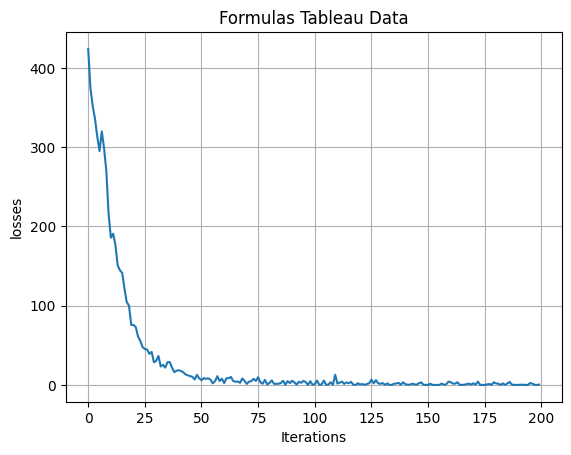

In [54]:

plt.plot(history_formulas['niter'],history_formulas['losses'])
plt.xlabel('Iterations')
plt.ylabel('losses')
plt.grid()
plt.title("Formulas Tableau Data")

In [55]:
save_model('Formulas_Tableau_data',' ')

Model saved to: /content/Formulas_Tableau_data


In [56]:
# check if the model is working
# Assuming 'nlp' is your loaded model
path='/content/Formulas_Tableau_data'
nlp= spacy.load(path)
ner = nlp.get_pipe("ner")

# List all labels the NER has been trained on
labels = ner.labels
print(labels)


('ADJ', 'ADP', 'ADV', 'ARGN', 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'INTJ', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'NOUN', 'NUM', 'OPER', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'PRON', 'PROPN', 'QUANTITY', 'TIME', 'VERB', 'WORK_OF_ART')


In [57]:
path='/content/Formulas_Tableau_data'
Test_ent_formulas,Test_formulas_data=get_entity(dff,dff.columns[1])
scores=evaluate_the_model(path,Test_formulas_data)


In [58]:
print(scores)

{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'tag_acc': None, 'sents_p': None, 'sents_r': None, 'sents_f': None, 'dep_uas': None, 'dep_las': None, 'dep_las_per_type': None, 'pos_acc': None, 'morph_acc': None, 'morph_micro_p': None, 'morph_micro_r': None, 'morph_micro_f': None, 'morph_per_feat': None, 'lemma_acc': None, 'ents_p': 1.0, 'ents_r': 1.0, 'ents_f': 1.0, 'ents_per_type': {'OPER': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ARGN': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ADV': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ADP': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'NUM': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'CARDINAL': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'PROPN': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'NOUN': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'ORG': {'p': 1.0, 'r': 1.0, 'f': 1.0}}, 'speed': 4957.653966254908}


# Make predictions on Formulas Tableau Data

In [59]:
# text
make_predictions(path,dff[dff.columns[1]][3])

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ruler_intj', 'ruler_verb', 'ruler_num', 'ruler_adv', 'ruler_pron', 'ruler_adp', 'ruler_noun', 'ruler_adj', 'ruler_propn', 'ruler_arg', 'ruler_argn', 'ruler_numm', 'ruler_advv', 'ruler_oper', 'ruler_adpp', 'ruler_nounn', 'ruler_adjj', 'ner']
COUNT ( * ) 
COUNT OPER


In [60]:
# text
make_predictions(path,dff[dff.columns[1]][0])

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ruler_intj', 'ruler_verb', 'ruler_num', 'ruler_adv', 'ruler_pron', 'ruler_adp', 'ruler_noun', 'ruler_adj', 'ruler_propn', 'ruler_arg', 'ruler_argn', 'ruler_numm', 'ruler_advv', 'ruler_oper', 'ruler_adpp', 'ruler_nounn', 'ruler_adjj', 'ner']
SUM ( Sepal Width ) 
SUM OPER
Sepal Width ARGN


#END

# Loading Test Dataset: formulas_test.xlsx

In [61]:
df=pd.read_excel("formulas_test.xlsx")
print(df.head(5))

                               Description             Formula (Tableau)
0         Total Sepal Width in the dataset              SUM(Sepal Width)
1  Average Petal Length across all flowers             AVG(Petal Length)
2                    Median of Sepal Width           MEDIAN(Sepal Width)
3        Number of entries in the database                      COUNT(*)
4            Unique count of Petal Lengths  COUNT DISTINCT(Petal Length)


#Extracting symbols from Formulas (Tableau)

In [62]:

def gather_sym(data,column_name):
    dp=data[column_name]
    dp_text=[]
    dp_sym=[]
    for row in dp:
         drow_text=[]
         drow_sym =[]
         for item in row:
              if re.match(r'\w+',item):
                    drow_text.append(item)
              else:
                    drow_sym.append(item)
         dp_text.append(drow_text)
         dp_sym.append(drow_sym)
    return dp_text,dp_sym


In [63]:
dg_formulas_text,dg_formulas_sym=gather_sym(dg_tok,dg_tok.columns[1])

In [64]:
print(dg_formulas_text)

[['SUM', 'Sepal', 'Length'], ['AVG', 'Sepal', 'Width'], ['MEDIAN', 'Petal', 'Length'], ['COUNT'], ['COUNT', 'DISTINCT', 'Species'], ['MIN', 'Sepal', 'Length'], ['MAX', 'Petal', 'Width'], ['GROUP', 'BY', 'Species'], ['ORDER', 'BY', 'Sepal', 'Length', 'ASC'], ['ORDER', 'BY', 'Species', 'ASC'], ['Sepal', 'Length', '5', '0'], ['Petal', 'Length', 'BETWEEN', '1', '5', 'AND', '2', '5'], ['TOP', '3', 'BY', 'Sepal', 'Width', 'DESC'], ['Species', 'Setosa'], ['Species', 'STARTS', 'WITH', 'Se'], ['SUM', 'Petal', 'Length'], ['AVG', 'Petal', 'Width'], ['MEDIAN', 'Sepal', 'Width'], ['COUNT', 'Sepal', 'Length'], ['COUNTD', 'Species'], ['MIN', 'Sepal', 'Length'], ['MAX', 'Petal', 'Width'], ['SORT', 'Species', 'DESC'], ['SORT', 'Sepal', 'Length', 'ASC'], ['Sepal', 'Length', '4', '5'], ['Petal', 'Width', '2', '0'], ['Sepal', 'Width', '3', '0'], ['ENDSWITH', 'Species', 'ica'], ['Sepal', 'Length', '5', '0'], ['INDEX', '5', 'SORT', 'BY', 'SUM', 'Sepal', 'Width', 'DESC'], ['INDEX', '3', 'SORT', 'BY', 'Petal'

In [65]:
print(dg_formulas_sym)

[['(', ')'], ['(', ')'], ['(', ')'], ['(', '*', ')'], ['(', ')'], ['(', ')'], ['(', ')'], ['(', ')'], ['(', ')'], ['(', ')'], ['>', '=', '.'], ['.', '.'], ['(', ')'], ['=', "'", "'"], ["'", "'"], ['(', '[', ']', ')'], ['(', '[', ']', ')'], ['(', '[', ']', ')'], ['(', '[', ']', ')'], ['(', '[', ']', ')'], ['(', '[', ']', ')'], ['(', '[', ']', ')'], ['(', '[', ']', ',', ')'], ['(', '[', ']', ',', ')'], ['[', ']', '>', '=', '.'], ['[', ']', '<', '.'], ['[', ']', '!', '=', '.'], ['(', '[', ']', ',', '"', '"', ')'], ['[', ']', '=', '.'], ['(', ')', '<', '=', '(', '[', ']', ')'], ['(', ')', '<', '=', '[', ']'], ['[', ']', '>', '=', '[', ']', '<', '='], ['(', "'", "',", '[', ']', ')'], ['(', '[', ']', ')', '=', '(', '(', ')', ')', '-'], ['[', ']', '>', '=', '(', "'", "'", ',', '(', ')', ')'], ['(', '[', ']', ')', '[', ']', '[', ']'], ['(', '(', '[', ']', ')', '=', "'", "'", '[', ']', ')'], ['[', ']', '>', '.', '[', ']', '>', '.'], ['(', '[', ']', ')', '<', '=', '.'], ['(', '[', ']', ')'], ['(

In [66]:
dg_tok.drop(dg_tok.columns[1], axis=1)

,Tokenized Description
0,"[Sum, of, Sepal, Length]"
1,"[Average, Sepal, Width, across, all, entries]"
2,"[Find, the, median, Petal, Length]"
3,"[Count, the, number, of, records, in, the, dat..."
4,"[Count, distinct, species, in, the, dataset]"
5,"[Minimum, value, of, Sepal, Length]"
6,"[Maximum, Petal, Width, found, in, the, dataset]"
7,"[Group, records, by, Species]"
8,"[Sort, the, entries, by, Sepal, Length, in, as..."
9,"[List, Species, alphabetically]"


Adding columns to dg_tok of Formulas and Symbols in separated way

In [67]:
dg_tok["Tokenized Formula (Tableau)"]=dg_formulas_text

In [68]:
dg_tok["Tokenized Symbols (Tableau)"]=dg_formulas_sym

In [69]:
print(dg_tok.head(10))

                               Tokenized Description  \
0                           [Sum, of, Sepal, Length]   
1      [Average, Sepal, Width, across, all, entries]   
2                 [Find, the, median, Petal, Length]   
3  [Count, the, number, of, records, in, the, dat...   
4       [Count, distinct, species, in, the, dataset]   
5                [Minimum, value, of, Sepal, Length]   
6   [Maximum, Petal, Width, found, in, the, dataset]   
7                      [Group, records, by, Species]   
8  [Sort, the, entries, by, Sepal, Length, in, as...   
9                    [List, Species, alphabetically]   

       Tokenized Formula (Tableau) Tokenized Symbols (Tableau)  
0             [SUM, Sepal, Length]                      [(, )]  
1              [AVG, Sepal, Width]                      [(, )]  
2          [MEDIAN, Petal, Length]                      [(, )]  
3                          [COUNT]                   [(, *, )]  
4       [COUNT, DISTINCT, Species]                      [(

# Recognition of entities

In [70]:
def get_pos_(data,col_name):
  dd=[]
  gg=[]
  for tok in data[col_name]:

          for ent in nlp(str(list(str(tok).split()))):
              # checking text between punct
              dd.append({ent.text:ent.pos_})
              gg.append({ent.pos_:ent.text})
  return dd,gg

In [71]:
def get_patterns(data,col_name):
     dt,dp=get_pos_(data,col_name)

     pos_=[list(item.keys())[0] for item in dp]
     pos_=list(set(pos_))
     print(dt)
     print(col_name,":",pos_)
     patterns={}
     for key in pos_:
         patterns.update({key:list(set([d[key] for d in dp if  key==list(d.keys())[0]]))})
     return patterns

In [72]:
dg_ent={}

In [73]:
p_t=dg_ent['Patterns_Description']=get_patterns(description,"vocab")

[{'[': 'X'}, {"'": 'PUNCT'}, {'sorted': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Average': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'with': 'ADP'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'NUM'}, {'5': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'Entries': 'NOUN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'low': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'median': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'each': 'PRON'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'starting': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Top': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'exactly': 'ADV'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'highest': 'ADJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PROPN'}, {'Total': 'ADJ'}, {"'": 'PUNCT'}, {']

In [74]:
for pat in p_d:
   print({pat:p_d[pat]})

{'NOUN': ['Sum', 'Entries', 'flowers', 'types', 'points', 'Determine', 'Species', 'field', 'Number', 'List', 'data', 'Lengths', 'species', 'value', 'number', 'observation', 'entries', 'name', 'color', 'flower', 'versicolor', 'order', 'occurrences', 'month', 'year', 'records', 'Widths']}
{'X': ['median', 'setosa', '10th', 'virginica']}
{'NUM': ['4', '5', '1', '10', '0', '3', '2']}
{'PRON': ['both', 'this', 'there', 'all', 'each', 'What']}
{'DET': ['the']}
{'AUX': ['is', 'are']}
{'ADP': ['across', 'with', 'for', 'in', 'above', 'of', 'at', 'over', 'within', 'between', 'than', 'from', 'by']}
{'VERB': ['sorted', 'Aggregate', 'descending', 'recorded', 'contains', 'Organize', 'found', 'starting', 'ends', 'assuming', 'grouped', 'start', 'ascending', 'Find', 'Show', 'show', 'count', 'starts', 'Display']}
{'ADV': ['alphabetically', 'Sort', 'exactly', 'only']}
{'SCONJ': ['where', 'How', 'how']}
{'INTJ': ['%']}
{'PROPN': ['Date', 'Iris', 'Maximum', 'Rank', 'Filter', 'Count', 'Group', 'Setosa', 'Me

In [75]:
p_d=dg_ent['Patterns_Description']=get_patterns(dg_tok,dg_tok.columns[0])

[{'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'Sum': 'PROPN'}, {"'": 'NUM'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'of': 'ADP'}, {"'": 'NUM'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Length': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Average': 'ADJ'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Width': 'PROPN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'across': 'ADP'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'all': 'PRO

In [76]:
for pat in p_d:
   print({pat:p_d[pat]})

{'NOUN': ['Entries', 'flowers', 'types', 'points', 'Determine', 'Species', 'C', 'field', 'Number', 'List', 'data', 'Lengths', 'species', 'value', 'number', 'observation', 'entries', 'name', 'color', 'flower', 'Sepal', 'versicolor', 'order', 'occurrences', 'month', 'year', 'records', 'Widths', 'Display']}
{'X': ['1', '[', '0', 'Length', 'virginica', 'median', ']', "'", '2', '10th']}
{'NUM': ['4', '5', '10', "'", '3']}
{'PRON': ['both', 'the', 'a', 'this', 'there', 'all', 'each', 'What']}
{'DET': ['the', 'a']}
{'AUX': ['is', 'are', "'s"]}
{'ADP': ['with', 'in', 'from', 'between', 'of', 'above', 'at', 'over', 'within', 'across', 'than', 'by', 'for']}
{'VERB': ['Date', 'sorted', 'setosa', 'percentile', 'dataset', 'Aggregate', 'descending', "'", 'recorded', 'contains', 'Calculate', 'Organize', 'found', 'starting', 'ends', 'top', 'assuming', 'grouped', 'start', 'ascending', 'ica', 'Find', 'Show', 'show', 'Setosa', 'count', 'starts']}
{'ADV': ['alphabetically', 'Sort', 'exactly', 'only']}
{'S

In [77]:
p_t=dg_ent['Patterns_Formula(Tableau)']=get_patterns(formulas,'vocab')

[{'[': 'X'}, {"'": 'NUM'}, {'4': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'AND': 'CCONJ'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'DESC': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'NUM'}, {'5': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PROPN'}, {'=': 'X'}, {"'": 'X'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Date': 'PROPN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'NUM'}, {'0': 'NUM'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'setosa': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'DISTINCT': 'NOUN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {':': 'PUNCT'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'STARTSWITH': 'X'}, {"'": 'NOUN'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'LISTED': 'VERB'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'>': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {"

In [78]:
for pat in p_t:
    print({pat:p_t[pat]})

{'NOUN': ['ORDER', 'month', 'DISTINCT', 'INDEX', 'TODAY', 'YEAR', "'", 'color', 'ENDSWITH', 'year', 'versicolor', 'FIXED', 'Species']}
{'X': ['setosa', '=', '[', 'virginica', 'STARTSWITH', '>', "'", 'CONTAINS', '*', '<']}
{'NUM': ['4', '5', '1', '0', 'TOP', '9', "'", '3', '2']}
{'PRON': ['}']}
{'AUX': ['RANK_PERCENTILE']}
{'ADP': ['BETWEEN', 'WITH', 'FROM']}
{'VERB': ['DESC', '-', 'LISTED', 'RANK', "'"]}
{'ADV': ['alphabetically', 'ELSE', 'SORT', 'THEN']}
{'SCONJ': ['IF']}
{'INTJ': ["'"]}
{'PROPN': ['Date', 'MIN', 'DATETRUNC', 'END', 'MEDIAN', 'ASC', 'AVG', 'MAX', 'Setosa', "'", 'COUNT', 'COUNTD', 'GROUP', 'NULL', 'STARTS', 'SUM', 'LEFT']}
{'CCONJ': ['AND']}
{'PART': ['to']}
{'ADJ': ['lowest', 'SORTED', 'highest']}
{'PUNCT': ['”', '“', ':', '!', ']', "'", '{', '"', ',']}


In [79]:
p_t=dg_ent['Patterns_Formula(Tableau)']=get_patterns(dg_tok,dg_tok.columns[1])

[{'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'SUM': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Length': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'AVG': 'PROPN'}, {"'": 'NUM'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Width': 'PROPN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'MEDIAN': 'PROPN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Petal': 'ADJ'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'":

In [80]:
for pat in p_t:
    print({pat:p_t[pat]})

{'NOUN': ['ORDER', 'Date', 'C', 'month', 'TODAY', 'YEAR', 'year', "'", 'ENDSWITH', 'FIXED', 'Sepal', 'versicolor', 'SUM', 'Species']}
{'X': ['ica', '1', '0', '[', 'Length', 'virginica', "'", '2']}
{'NUM': ['4', '5', 'TOP', '9', "'", '3']}
{'AUX': ['RANK_PERCENTILE']}
{'DET': ['a']}
{'ADP': ['BETWEEN', 'BY', 'FROM', 'WITH']}
{'VERB': ['Date', 'DESC', 'setosa', 'DISTINCT', 'STARTSWITH', 'LISTED', 'RANK', "'", 'color', 'ENDSWITH', 'NULL', 'SUM', 'CONTAINS']}
{'ADV': ['alphabetically', 'ELSE', 'SORT', 'THEN']}
{'SCONJ': ['IF']}
{'PROPN': ['Date', "'", 'Species', 'END', 'Se', 'MAX', 'LEFT', 'MIN', 'INDEX', 'ASC', 'AVG', 'Width', 'Iri', 'COUNT', 'DATETRUNC', 'Length', 'Setosa', 'COUNTD', 'GROUP', 'STARTS', 'MEDIAN']}
{'CCONJ': ['AND']}
{'PART': ['to']}
{'ADJ': ['lowest', 'SORTED', 'Petal', 'highest']}
{'PUNCT': [']', '"', "'", ',']}


In [81]:
p_e=dg_ent['Patterns_Symbols(Tableau)']=get_patterns(dg_tok,dg_tok.columns[2])

[{'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'(': 'PUNCT'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {')': 'PUNCT'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'(': 'PUNCT'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {')': 'PUNCT'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'(': 'PUNCT'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {')': 'PUNCT'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'(': 'PUNCT'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'*': 'PUNCT'}, {"'": 'NUM'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'

In [82]:
for pat in p_e:
    print({pat:p_e[pat]})

{'X': ['[', '>', ']', "'", '<']}
{'NUM': ["'"]}
{'PRON': ['}']}
{'VERB': ["'", '=']}
{'PROPN': ['-', '\\', "'", '\\\'"\\']}
{'PUNCT': ['(', '”', '“', ':', '!', '.', "'", ']', ')', '{', '"', '*', ',']}


In [83]:
POS_=[]
for pat in p_d:
   POS_.append(pat)
for pat in p_t:
   POS_.append(pat)
for pat in p_e:
   POS_.append(pat)
POS_=list(set(POS_))
print(POS_, len(POS_))

['NOUN', 'X', 'PRON', 'NUM', 'DET', 'AUX', 'ADP', 'VERB', 'ADV', 'SCONJ', 'INTJ', 'PROPN', 'CCONJ', 'PART', 'ADJ', 'PUNCT'] 16


In [84]:
ENT_={}

for pat in POS_:
  if (p_d.get(pat)!=None and p_t.get(pat)!=None and p_e.get(pat) !=None):
    p_list=p_d[pat]+p_t[pat]+p_e[pat]
  elif (p_d.get(pat)!=None and p_t.get(pat)!=None ):
    p_list=p_d[pat] + p_t[pat]
  else:
    p_list=p_d[pat]

  ENT_.update({pat:[x for x in list(set(p_list))]})

In [85]:
for pat in POS_:
  print ({pat:ENT_[pat]})

{'NOUN': ['Date', 'flowers', 'Entries', 'types', "'", 'points', 'Determine', 'FIXED', 'C', 'Species', 'ORDER', 'field', 'Number', 'List', 'data', 'ENDSWITH', 'Lengths', 'species', 'value', 'number', 'observation', 'entries', 'name', 'color', 'flower', 'Sepal', 'versicolor', 'SUM', 'order', 'occurrences', 'month', 'TODAY', 'year', 'YEAR', 'records', 'Widths', 'Display']}
{'X': ['ica', '1', '0', '[', 'Length', 'virginica', 'median', '>', ']', "'", '2', '<', '10th']}
{'PRON': ['both', 'the', 'a', 'this', 'there', 'all', 'each', 'What']}
{'NUM': ['4', '5', '10', 'TOP', '9', "'", '3']}
{'DET': ['the', 'a']}
{'AUX': ['is', 'are', 'RANK_PERCENTILE', "'s"]}
{'ADP': ['BY', 'across', 'with', 'for', 'WITH', 'in', 'BETWEEN', 'FROM', 'of', 'above', 'at', 'over', 'within', 'between', 'than', 'from', 'by']}
{'VERB': ['Date', 'sorted', 'setosa', 'DESC', '=', 'DISTINCT', 'percentile', 'dataset', 'STARTSWITH', 'LISTED', 'Aggregate', 'descending', 'RANK', "'", 'recorded', 'contains', 'found', 'Organize',

#Tokenize with Pre-trained sPacy models

In [86]:
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()

# Description Patterns

In [87]:
dg_ent={}

In [88]:
p_d=dg_ent['Patterns_Description']=get_patterns(dg_tok,dg_tok.columns[0])

[{'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'Sum': 'PROPN'}, {"'": 'NUM'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'of': 'ADP'}, {"'": 'NUM'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Length': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'PUNCT'}, {'Average': 'ADJ'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Width': 'PROPN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'across': 'ADP'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'all': 'PRO

In [89]:
for pat in p_d:
   print({pat:p_d[pat]})

{'NOUN': ['Entries', 'flowers', 'types', 'points', 'Determine', 'Species', 'C', 'field', 'Number', 'List', 'data', 'Lengths', 'species', 'value', 'number', 'observation', 'entries', 'name', 'color', 'flower', 'Sepal', 'versicolor', 'order', 'occurrences', 'month', 'year', 'records', 'Widths', 'Display']}
{'X': ['1', '[', '0', 'Length', 'virginica', 'median', ']', "'", '2', '10th']}
{'NUM': ['4', '5', '10', "'", '3']}
{'PRON': ['both', 'the', 'a', 'this', 'there', 'all', 'each', 'What']}
{'DET': ['the', 'a']}
{'AUX': ['is', 'are', "'s"]}
{'ADP': ['with', 'in', 'from', 'between', 'of', 'above', 'at', 'over', 'within', 'across', 'than', 'by', 'for']}
{'VERB': ['Date', 'sorted', 'setosa', 'percentile', 'dataset', 'Aggregate', 'descending', "'", 'recorded', 'contains', 'Calculate', 'Organize', 'found', 'starting', 'ends', 'top', 'assuming', 'grouped', 'start', 'ascending', 'ica', 'Find', 'Show', 'show', 'Setosa', 'count', 'starts']}
{'ADV': ['alphabetically', 'Sort', 'exactly', 'only']}
{'S

# Formulas (Tableau) Patterns

In [90]:
p_t=dg_ent['Patterns_Formula(Tableau)']=get_patterns(dg_tok,dg_tok.columns[1])

[{'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'VERB'}, {'SUM': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Length': 'X'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'AVG': 'PROPN'}, {"'": 'NUM'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Sepal': 'NOUN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Width': 'PROPN'}, {"'": 'PUNCT'}, {']': 'PUNCT'}, {'"': 'PUNCT'}, {']': 'PUNCT'}, {'[': 'X'}, {'"': 'PUNCT'}, {'[': 'X'}, {"'": 'X'}, {'MEDIAN': 'PROPN'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'": 'PUNCT'}, {'Petal': 'ADJ'}, {"'": 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {',': 'PUNCT'}, {'"': 'PUNCT'}, {"'":

In [91]:
for pat in p_t:
   print({pat:p_t[pat]})

{'NOUN': ['ORDER', 'Date', 'C', 'month', 'TODAY', 'YEAR', 'year', "'", 'ENDSWITH', 'FIXED', 'Sepal', 'versicolor', 'SUM', 'Species']}
{'X': ['ica', '1', '0', '[', 'Length', 'virginica', "'", '2']}
{'NUM': ['4', '5', 'TOP', '9', "'", '3']}
{'AUX': ['RANK_PERCENTILE']}
{'DET': ['a']}
{'ADP': ['BETWEEN', 'BY', 'FROM', 'WITH']}
{'VERB': ['Date', 'DESC', 'setosa', 'DISTINCT', 'STARTSWITH', 'LISTED', 'RANK', "'", 'color', 'ENDSWITH', 'NULL', 'SUM', 'CONTAINS']}
{'ADV': ['alphabetically', 'ELSE', 'SORT', 'THEN']}
{'SCONJ': ['IF']}
{'PROPN': ['Date', "'", 'Species', 'END', 'Se', 'MAX', 'LEFT', 'MIN', 'INDEX', 'ASC', 'AVG', 'Width', 'Iri', 'COUNT', 'DATETRUNC', 'Length', 'Setosa', 'COUNTD', 'GROUP', 'STARTS', 'MEDIAN']}
{'CCONJ': ['AND']}
{'PART': ['to']}
{'ADJ': ['lowest', 'SORTED', 'Petal', 'highest']}
{'PUNCT': [']', '"', "'", ',']}


#Tutorial of sPacy

In [92]:
text="Sum of Sepal Length SUM (Sepal Length)"
doc=nlp(text)
for token in doc.ents:
   print(token.text, token.label_,token.start_char,token.end_char, token.start, token.ent_id_, token.label, token.vector_norm)
#for token in doc:
#   print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
#           token.shape_, token.is_alpha, token.is_stop,token.ent_iob_, token.ent_type_)

Sepal Length PERSON 25 37 6  380 7.3880568


In [93]:
# Create a span for the new entity
fb_ent = span.Span(doc, 0, 1, label="ORG")
orig_ents = list(doc.ents)

In [94]:
# Option 2: Assign a complete list of ents to doc.ents
doc.ents = orig_ents + [fb_ent]

In [95]:
# Add special case rule
from spacy.symbols import ORTH
special_case = [{ORTH: "gim"}, {ORTH: "me"}]
nlp.tokenizer.add_special_case("gimme", special_case)


In [96]:
# Tokenization and POS tagging result
tokens = [("Sum", "VERB"), ("of", "ADP"), ("Sepal", "NOUN"), ("Length", "NOUN")]
# Example mappings based on POS tagging results
operation_mapping = {"VERB": {"Sum": "SUM", "Average": "AVG", "Count": "COUNT"}}
field_mapping = {"NOUN": ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width","Species"]}


#Template of Training data

In [97]:
TRAIN_DATA = []

#for example in your_extracted_data: # see example above entities = []

#for entity in example['data']:  # iterate over the entities


#    text, label, start, end = entity  # ('want', '@command', 2, 6)

#    label = label.split('@')[1].upper()  # not necessary, but nicer

#    end = end - 1  # correct the end character index

#    entities.append((start, end, label))

# add training example of (text, annotations) tuple

#TRAIN_DATA.append((example['sentence'], {'entities': entities}))

This should give you training data that looks like this:

In [98]:


[ ('I want apples', {'entities': [(2, 5, 'COMMAND'), (7, 12, 'FRUIT')]}) ]

[('I want apples', {'entities': [(2, 5, 'COMMAND'), (7, 12, 'FRUIT')]})]

# DEFINE ENTITY RULER BEFORE NER

One potential difficulty in your example is that it's not very close to natural language. The pre-trained English models were trained on ~2m words of general web and news text, so they're not always going to perform perfect out-of-the-box on text with a very different structure.

While you could update the model with more examples of QUANTITY in your specific texts, I think that a rule-based approach might actually be a better and more efficient solution here.

The example in this blog post is actually very close to what you're trying to do:

import spacy

from spacy.pipeline import EntityRuler

nlp = spacy.load("en_core_web_sm")

weights_pattern = [
    {"LIKE_NUM": True},

    {"LOWER": {"IN": ["g", "kg", "grams", "kilograms", "lb", "lbs", "pounds"]}}
]
patterns = [{"label": "QUANTITY", "pattern": weights_pattern}]

ruler = EntityRuler(nlp, patterns=patterns)

nlp.add_pipe(ruler, before="ner")

doc = nlp("U.S. average was 2 lbs.")

print([(ent.text, ent.label_) for ent in doc.ents])

 [('U.S.', 'GPE'), ('2 lbs', 'QUANTITY')]

The statistical named entity recognizer respects pre-defined entities and wil "predict around" them. So if you're adding the EntityRuler before it in the pipeline, your custom QUANTITY entities will be assigned first and will be taken into account when the entity recognizer predicts labels for the remaining tokens.

Note that this example is using the latest version of spaCy, v2.1.x. You might also want to add more patterns to cover different constructions. For more details and inspiration, check out the documentation on the EntityRuler, combining models and rules and the token match pattern syntax.

In [99]:
import spacy

from spacy.pipeline import EntityRuler

nlp = spacy.load("en_core_web_sm")

weights_pattern = [ {"LIKE_NUM": True},
{"LOWER":{"IN":["g","kg","grams","kilograms","lb"
,"lbs","pounds"]}}]

patterns = [{"label": "QUANTITY", "pattern": weights_pattern}]

ruler = EntityRuler(nlp, patterns=patterns,overwrite_ents=True)

ruler.name="entity_ruler"
nlp.add_pipe("entity_ruler", before="ner")

doc = nlp("U.S. average was 2 lbs .")

print([(ent.text, ent.label_) for ent in doc.ents])

[('U.S.', 'GPE'), ('2', 'CARDINAL')]


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/entityruler.py:405: UserWarning: [W036] The component 'entity_ruler' does not have any patterns defined.
  warnings.warn(Warnings.W036.format(name=self.name))


In [100]:
import spacy
from spacy.pipeline import EntityRuler

nlp = spacy.load('en_core_web_sm', disable=['ner'])


patterns=[]
flower_patterns = [{"label": "FLOWER", "pattern": flower} for flower in ["rose", "tulip", "african daisy"]]
patterns.extend(flower_patterns)

# Initialize the EntityRuler for animals
animal_patterns = [{"label": "ANIMAL", "pattern": animal} for animal in ["cat", "dog", "artic fox"]]
patterns.extend(animal_patterns)

# Initialize the EntityRuler and add the combined patterns
ruler = EntityRuler(nlp, patterns=patterns,overwrite_ents=True)
#ruler = EntityRuler(nlp, overwrite_ents=True)
#ruler.add_patterns(patterns)

# Add the EntityRuler to the pipeline with a unique name
ruler.name="entity_ruler"
nlp.add_pipe("entity_ruler", before="ner")

# Example usage
doc = nlp("I saw a rose and a cat.")
for ent in doc.ents:
    print(ent.text, ent.label_)


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/entityruler.py:405: UserWarning: [W036] The component 'entity_ruler' does not have any patterns defined.
  warnings.warn(Warnings.W036.format(name=self.name))


In [101]:
import spacy
from spacy.pipeline import EntityRuler

nlp = spacy.load('en_core_web_sm', disable=['ner'])

# Initialize the EntityRuler
ruler = EntityRuler(nlp, overwrite_ents=True)

# Define patterns
flower_patterns = [{"label": "FLOWER", "pattern": flower} for flower in ["rose", "tulip", "african daisy"]]
animal_patterns = [{"label": "ANIMAL", "pattern": animal} for animal in ["cat", "dog", "artic fox"]]

# Add patterns to the ruler
ruler.add_patterns(flower_patterns + animal_patterns)

ruler.name='entity_ruler'
# Add the EntityRuler to the pipeline
nlp.add_pipe('entity_ruler')

# Test the pipeline
doc = nlp("I saw a rose and a cat.")
for ent in doc.ents:
    print(ent.text, ent.label_)


/usr/local/lib/python3.10/dist-packages/spacy/pipeline/entityruler.py:405: UserWarning: [W036] The component 'entity_ruler' does not have any patterns defined.
  warnings.warn(Warnings.W036.format(name=self.name))


# Claude code !!

In [102]:
import spacy
from spacy.language import Language
from spacy.pipeline import EntityRuler

nlp = spacy.load('en_core_web_sm')

# Function to create and return an EntityRuler with specified patterns
def create_ruler(patterns, label):
    ruler = EntityRuler(nlp, overwrite_ents=True)
    formatted_patterns = [{"label": label, "pattern": pattern} for pattern in patterns]
    ruler.add_patterns(formatted_patterns)
    return ruler

# Define your patterns
flowers = ["rose", "tulip", "african daisy"]
animals = ["cat", "dog", "artic fox"]
weights = ["g","kg","grams","kilograms","lb","lbs","pounds"]



# Create rulers
ruler_plants = create_ruler(flowers, "FLOWER")
ruler_animals = create_ruler(animals, "ANIMAL")
ruler_weights = create_ruler(weights,"QUANTITY")

# Create component factories
@Language.component("ruler_plants")
def ruler_plants_component(doc):
    return ruler_plants(doc)

@Language.component("ruler_animals")
def ruler_animals_component(doc):
    return ruler_animals(doc)

@Language.component('ruler_weights')
def ruler_weights_component(doc):
     return ruler_weights(doc)

# Add the components to the pipeline
nlp.add_pipe("ruler_plants", before="ner")
nlp.add_pipe("ruler_animals", before="ner")
nlp.add_pipe("ruler_weights", before = "ner")

# Test
doc = nlp("I saw a rose and a cat. A dog smells a tulip. U.S. average was 2 lbs ")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

rose 8 12 FLOWER
cat 19 22 ANIMAL
dog 26 29 ANIMAL
tulip 39 44 FLOWER
U.S. 46 50 GPE
2 63 64 CARDINAL
lbs 65 68 QUANTITY


from spacy.lang.en import English

from spacy.matcher import Matcher

from spacy.tokens import Span

nlp = English()

matcher = Matcher(nlp.vocab)

def add_event_ent(matcher, doc, i, matches):

    # Get the current match and create tuple of entity label, start and end.

    # Append entity to the doc's entity. (Don't overwrite doc.ents!)

    match_id, start, end = matches[i]

    entity = Span(doc, start, end, label="EVENT")

    doc.ents += (entity,)

    print(entity.text)

pattern = [{"ORTH": "Google"}, {"ORTH": "I"}, {"ORTH": "/"}, {"ORTH": "O"}]

matcher.add("GoogleIO", [pattern], on_match=add_event_ent)

doc = nlp("This is a text about Google I/O")

matches = matcher(doc)

# RULE ENTITY DIRECTLY


# USE OF MACHER

nlp = spacy.load("en_core_web_sm")

matcher = Matcher(nlp.vocab)

Add match ID "HelloWorld" with no callback and one pattern

pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]

matcher.add("HelloWorld", [pattern])

doc = nlp("Hello, world! Hello world!")

matches = matcher(doc)

for match_id, start, end in matches:

    string_id = nlp.vocab.strings[match_id]  # Get string representation

    span = doc[start:end]  # The matched span

    print(match_id, string_id, start, end, span.text)


# VALIDATE ENTITY RULER
ruler = nlp.add_pipe("entity_ruler", config={"validate": True})


# ADD FUNCTION STRATEGY TO ADD A LOT OF NUMBER OF PATTERNS

ruler = nlp.add_pipe("entity_ruler")

patterns = [{"label": "TEST", "pattern": str(i)} for i in range(100000)]

with nlp.select_pipes(enable="tagger"):

    ruler.add_patterns(patterns)

# Span Ruler

In [103]:
import spacy

nlp = spacy.blank("en")
ruler = nlp.add_pipe("span_ruler")
patterns = [{"label": "ORG", "pattern": "Apple"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}]
ruler.add_patterns(patterns)

doc = nlp("Apple is opening its first big office in San Francisco.")
print([(span.text, span.label_) for span in doc.spans["ruler"]])

[('Apple', 'ORG'), ('San Francisco', 'GPE')]


# USAGE OF PRE-TRAINED MODELS

In [104]:
import spacy

nlp = spacy.load("en_core_web_sm")

import en_core_web_sm

nlp = en_core_web_sm.load()

#doc = nlp("This is a sentence.")
doc =nlp("Sum of Sepal Length")

print([(w.text, w.pos_) for w in doc])

# load without NER

nlp = spacy.load("en_core_web_sm", exclude=["ner"])

# source NER from the same pipeline package as the last component

nlp.add_pipe("ner", source=spacy.load("en_core_web_sm"))

# insert the entity ruler

nlp.add_pipe("entity_ruler", before="ner")

[('Sum', 'PROPN'), ('of', 'ADP'), ('Sepal', 'PROPN'), ('Length', 'PROPN')]


In [105]:
import spacy
from spacy.training import offsets_to_biluo_tags

# Load the model
nlp = spacy.load("en_core_web_sm")

# Example text and entities
text = "SUM(Sepal Length)"
#entities = [(0, 4, 'OPER'),(4, 16, 'ARGN')]  # This example might not be accurate; adjust as per your actual data.
entities = [(0, 4, 'OPERATION'), (4, 17, 'ARGUMENT')]


# Create a Doc object
doc = nlp.make_doc(text)

# Check alignment
biluo_tags = offsets_to_biluo_tags(doc, entities)

print(biluo_tags)
# Convert the offsets to BILUO tags
tags = offsets_to_biluo_tags(doc, entities)

# Print the tags to see the alignment
print(tags)


['-', '-', '-']
['-', '-', '-']


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "SUM(Sepal Length)" with entities "[(0, 4, 'OPERATION'), (4, 17, 'ARGUMENT')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


In [106]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "SUM(Sepal Length)"
res = nlp(text)
#You can either build the IOB tags by yourself:

IOB_tags = [
    "-".join(filter(len, (token.ent_iob_, token.ent_type_)))
    for token in res
]
#or you can use built-in functions (biluo_to_iob and offsets_to_biluo_tags):

from spacy.training import biluo_to_iob, offsets_to_biluo_tags

IOB_tags = biluo_to_iob(
    offsets_to_biluo_tags(
        res,
        [(ent.start_char, ent.end_char, ent.label_) for ent in res.ents],
    ),
)
print(IOB_tags)
print([(ent.start_char, ent.end_char, ent.label_) for ent in res.ents])

['O', 'O', 'O']
[]


In [107]:
# Your text
text = "SUM(Sepal Length)"

# Process the text
doc = nlp(text)

# Print out tokens and their character positions
for token in doc:
    print(token.text, token.idx, token.idx + len(token.text) - 1)

SUM(Sepal 0 8
Length 10 15
) 16 16
